Most popular artist: Ariana Grande with popularity: 95
Most popular artist: Ariana Grande
Most popular album: eternal sunshine (slightly deluxe)
Album tracks:
    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.475   0.370   10    -9.471     1       0.0517        0.6400   
1          0.640   0.662    2    -4.856     0       0.0308        0.2090   
2          0.512   0.729    9    -5.224     0       0.2100        0.4280   
3          0.554   0.364    9   -13.442     1       0.1510        0.9000   
4          0.658   0.503    9    -6.885     1       0.1020        0.5470   
5          0.591   0.708    8    -6.840     1       0.1290        0.1030   
6          0.700   0.535    9    -6.195     0       0.0790        0.4740   
7          0.787   0.631    7    -5.829     0       0.0487        0.1510   
8          0.785   0.761    1    -6.550     1       0.0538        0.2050   
9          0.646   0.638    5    -8.285     1       0.0410        0.0641   
10   

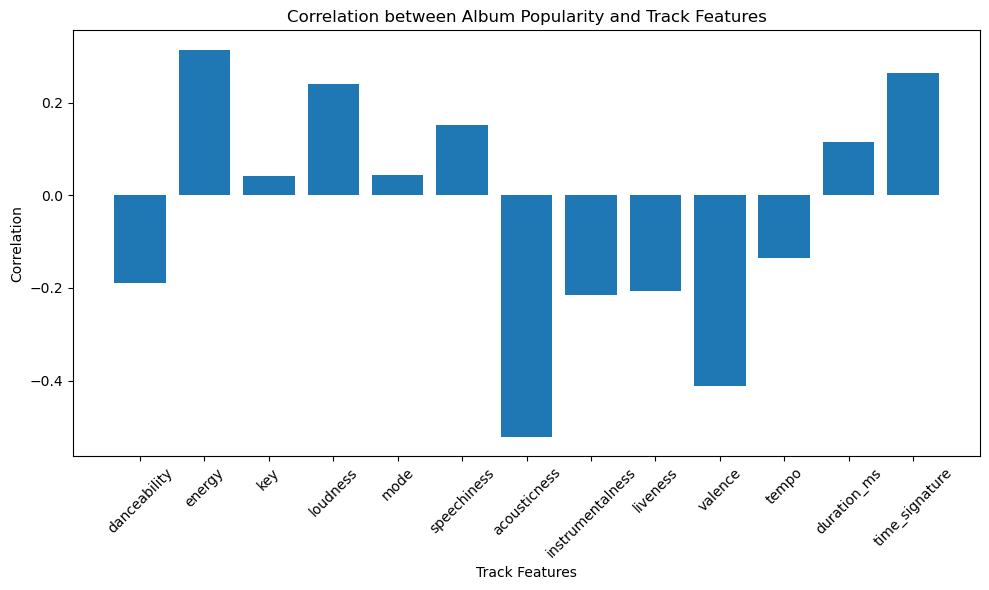

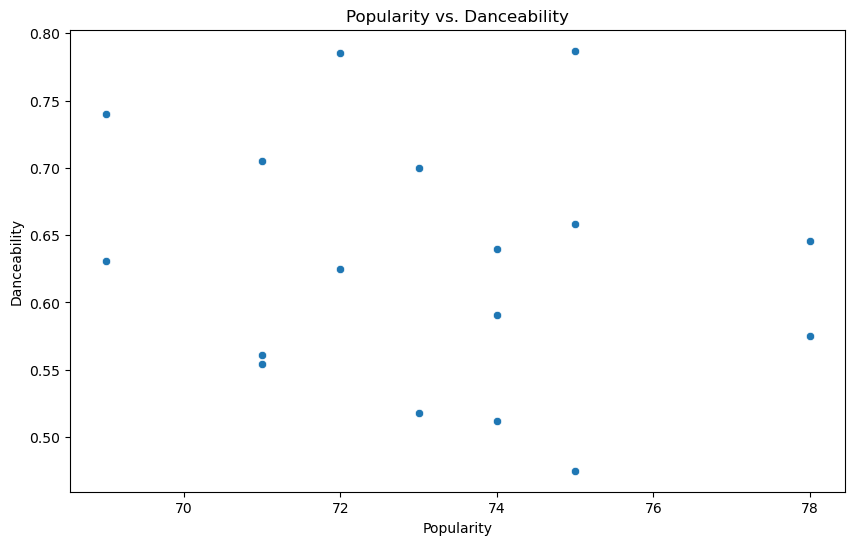

C:\Users\sri_p\AppData\Local\Temp\ipykernel_10184\2312926098.py:206: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=album_data, x='key', y='popularity', ci=None)


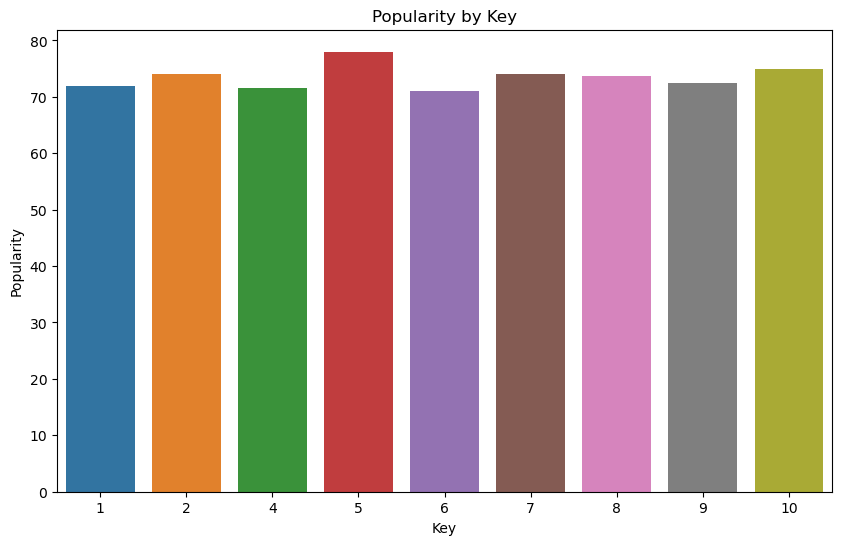

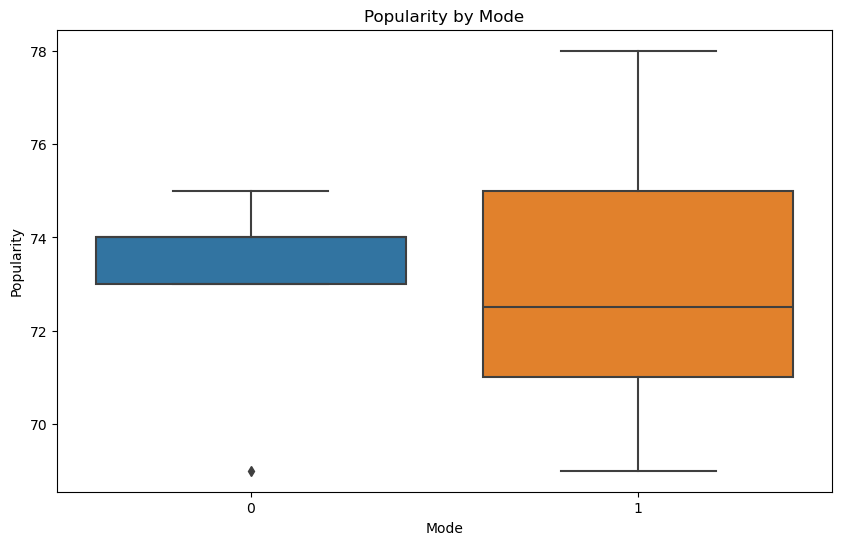

In [2]:
import requests
from accesstoken import access_token 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Spotify API endpoint for new releases
NEW_RELEASES_URL = "https://api.spotify.com/v1/browse/new-releases"
ARTIST_URL = "https://api.spotify.com/v1/artists/"
ALBUMS_URL = "https://api.spotify.com/v1/artists/{artist_id}/albums"
TRACKS_URL = "https://api.spotify.com/v1/albums/{album_id}/tracks"
Individual_TRACK_URL = "https://api.spotify.com/v1/tracks/{id}"
TRACK_FEATURES_URL = "https://api.spotify.com/v1/audio-features/{track_id}"

# Function to authenticate and get access token
def authenticate(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    payload = {'grant_type': 'client_credentials'}
    response = requests.post(auth_url, auth=(client_id, client_secret), data=payload)
    return response.json()['access_token']

# Function to get new releases
def get_new_releases(access_token, limit=50):
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'limit': limit}
    response = requests.get(NEW_RELEASES_URL, headers=headers, params=params)
    return response.json()

# Function to extract artists from new releases

def extract_artists(new_releases_data):
    artist_info = []
    for album in new_releases_data['albums']['items']:
        for artist in album['artists']:
            artist_info.append({'name': artist['name'], 'id': artist['id']})  # Append dictionaries to the list
    return artist_info


# Main function to find popular artists from new releases
def find_popular_artists(limit=50):
    new_releases_data = get_new_releases(access_token, limit)
    artists = extract_artists(new_releases_data)
    for artist in artists:
        artist['popularity'] = get_artist_popularity(artist['id'], access_token)
    return artists


# Function to get the popularity of an artist

def get_artist_popularity(artist_id, access_token):
    artist_url = ARTIST_URL + artist_id
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(artist_url, headers=headers)
    if response.status_code == 200:
        return response.json()['popularity']
    else:
        return None

def find_most_popular_artist(artists):
    most_popular_artist = None
    max_popularity = -1
    for artist in artists:
        if artist['popularity'] is not None and artist['popularity'] > max_popularity:
            most_popular_artist = artist
            max_popularity = artist['popularity']
    return most_popular_artist
    
# Function to get an artist's albums
def get_artist_albums(artist_id, access_token):
    albums_url = ALBUMS_URL.format(artist_id=artist_id)
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(albums_url, headers=headers)
    if response.status_code == 200:
        return response.json()['items']
    else:
        return None

# Function to get an album's tracks
def get_album_tracks(album_id, access_token):
    tracks_url = TRACKS_URL.format(album_id=album_id)
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(tracks_url, headers=headers)
    if response.status_code == 200:
        return response.json()['items']
    else:
        return None

# Function to find the most popular artist's album and its track features
def find_most_popular_album_and_tracks(most_popular_artist, access_token):
    artist_albums = get_artist_albums(most_popular_artist['id'], access_token)
    if artist_albums:
        most_popular_album = artist_albums[0]  # Assuming the first album is the most popular
        album_id = most_popular_album['id']
        album_tracks = get_album_tracks(album_id, access_token)
        if album_tracks:
            tracks_with_features = []
            for track in album_tracks:
                track_features = get_track_features(track['id'], access_token)
                if track_features:
                    track['features'] = track_features
                    track['popularity'] = get_track_popularity(track['id'], access_token)  # Add track popularity
                    tracks_with_features.append(track)
            return most_popular_album, tracks_with_features
        else:
            return most_popular_album, None
    else:
        return None, None
# Function to get track features
def get_track_features(track_id, access_token):
    track_features_url = TRACK_FEATURES_URL.format(track_id=track_id)
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(track_features_url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        return None       
        
# Function to get track popularity
def get_track_popularity(track_id, access_token):
    individual_track_url = Individual_TRACK_URL.format(id=track_id)
    headers = {'Authorization': f'Bearer {access_token}'}
    response = requests.get(individual_track_url, headers=headers)
    if response.status_code == 200:
        return response.json()['popularity']
    else:
        return None
        
popular_artists = find_popular_artists()
'''
for artist in popular_artists:
    print(artist)
'''    
most_popular_artist = find_most_popular_artist(popular_artists)
if most_popular_artist:
    print("Most popular artist:", most_popular_artist['name'], "with popularity:", most_popular_artist['popularity'])
else:
    print("No popular artists found.")

if most_popular_artist:
    print("Most popular artist:", most_popular_artist['name'])
    most_popular_album, album_tracks = find_most_popular_album_and_tracks(most_popular_artist, access_token)
    if most_popular_album:
        print("Most popular album:", most_popular_album['name'])
        print("Album tracks:")
        '''
        for track in album_tracks:
            print("- Track name:", track['name'])
            print("  Track duration:", track['duration_ms'], "ms")
            print("  Track ID:", track['id'])
            print("  Track features:", track['features']) 
            print("  Track popularity:", track['popularity']) 
            '''
    else:
        print("No albums found for the most popular artist.")
else:
    print("No popular artists found.")

# After retrieving album tracks and their features

# Extract track features and popularity
track_features_list = []
track_popularity_list = []
for track in album_tracks:
    if track['features'] and track['popularity'] is not None:  # Check if features and popularity are available
        track_features_list.append(track['features'])
        track_popularity_list.append(track['popularity'])

# Convert lists to DataFrame for analysis
track_features_df = pd.DataFrame(track_features_list)
track_popularity_df = pd.DataFrame({'popularity': track_popularity_list})

# Concatenate track features and popularity DataFrames
album_data = pd.concat([track_features_df, track_popularity_df], axis=1)

# Drop non-numeric columns
album_data_numeric = album_data.select_dtypes(include='number')
print(album_data_numeric)
# Calculate correlations between album popularity and track features
correlations = album_data_numeric.corr()['popularity'].drop('popularity')

# Print correlations
print("Correlation between album popularity and track features:")
print(correlations)


# Visualize the correlations
plt.figure(figsize=(10, 6))
plt.bar(correlations.index, correlations.values)
plt.title("Correlation between Album Popularity and Track Features")
plt.xlabel("Track Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of popularity vs. danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=album_data, x='popularity', y='danceability')
plt.title("Popularity vs. Danceability")
plt.xlabel("Popularity")
plt.ylabel("Danceability")
plt.show()

# Bar chart of popularity by key
plt.figure(figsize=(10, 6))
sns.barplot(data=album_data, x='key', y='popularity', ci=None)
plt.title("Popularity by Key")
plt.xlabel("Key")
plt.ylabel("Popularity")
plt.show()

# Box plot of popularity by mode
plt.figure(figsize=(10, 6))
sns.boxplot(data=album_data, x='mode', y='popularity')
plt.title("Popularity by Mode")
plt.xlabel("Mode")
plt.ylabel("Popularity")
plt.show()